# Implementation of MCD 

- This code is inspired by the book Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron





In [ ]:


def predict_proba(X, model, num_samples):
    preds = [model(X, training=True) for _ in range(num_samples)]
    return np.stack(preds)
     
def predict_class(X, model, num_samples):
    proba_preds = predict_proba(X, model, num_samples)
    return np.argmax(proba_preds, axis=1)







•	These two functions are the implementation of MCD.  The predict_proba() function turns dropout on at test time for a sample, and the amount of forward sampling is a parameter that can be chosen and 300 is chosen based on (Gal and Ghahramani, 2016).

•	The preds variable in predict_proba() function has a for loop, where the values are appended to a list called list comprehension. The model function in the loop takes the sample and turns training on (meaning turn dropout on at test time), then rans as many forward samples as specified by the functions num_samples variable.

•	The predict_proba then returns each of the 300 samples for each sample by stacking them on top of each other. 

•	The predict_class() then returns the highest value through the np.argmax() which returns highest value in a array, which is 0 or 1. The axis is to specify to take the highest row values.






In [ ]:
y_pred_proba_mean = predict_proba(Xtest, classifier, 300).mean(axis=0) 



• The above line of code takes the predict_proba() function and takes the mean of all the 300 forward samplings to find the mean of all the forward samples for both classes. 


In [ ]:
variance=predict_proba(Xtest, classifier, 300).var(axis=0)[:,0] 
variance

•	The variance variable will take the variance of all the 300 samples. 

•	The variance measures how spread a group of values are. The variance is used to measure it's uncertainty.

# Practical Diagram for the implementation of MCD in production

### This example is for an end user correcting uncertain examples. For example, It can be used in early stage ML models where there is not enough labeled data.

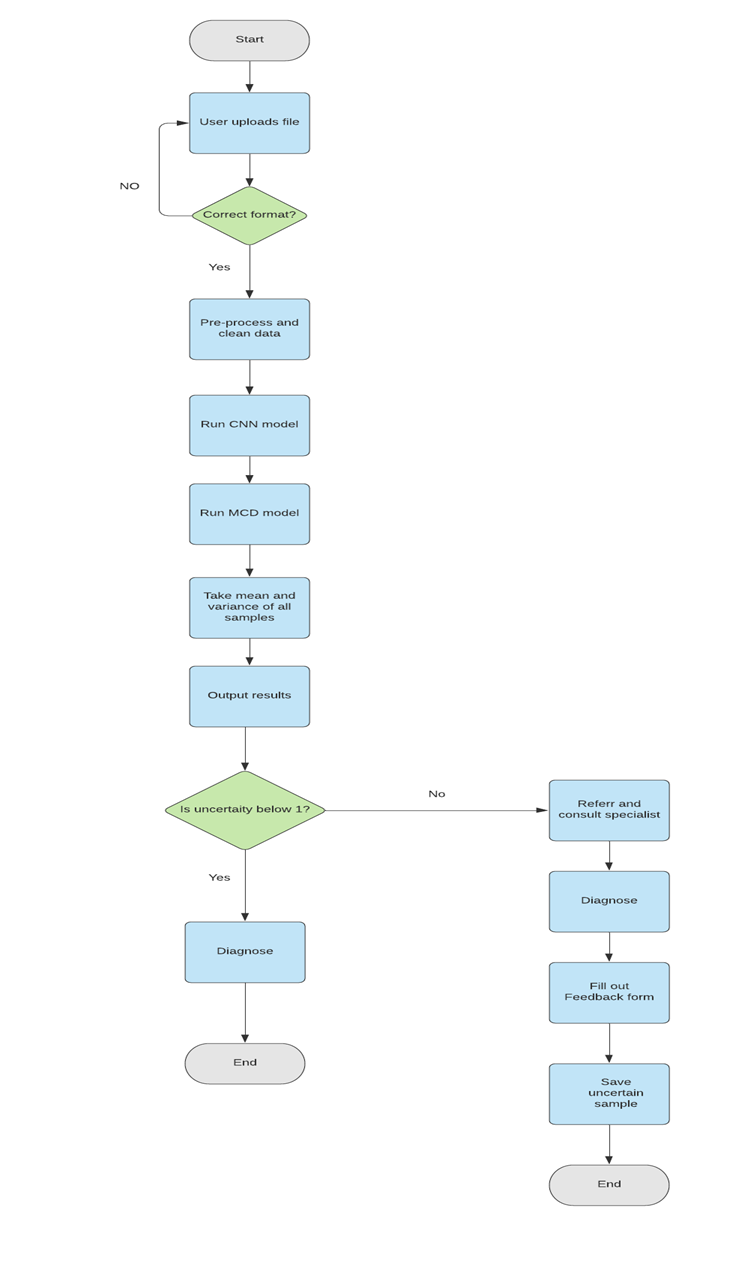

- The above is a diagram for image classification using CNNs in the medical domain.


- Once the user uploads a file, it is important to check it is the correct format and other validations based on your project.


- Pre-process and clean the data in the backend. 


- Run the CNN model along with the MCD model to generate the uncertainty of a model and show to the end user whether the model is uncertain or not.


- In this example, variance of above 1 is classified uncertain and this should be treated with caution. The end user can also have a feedback form so they can correct the model, and this will be used to improve the mode either autonomously or manually.



# A practical example will be uploaded using Flask, Keras, Numpy, Pandas and AWS with code and Documentation.